In [1]:
from qutip.qip.models.optpulseprocessor import OptPulseProcessor
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

# Main framework
The demo in this notebook is based on the branch https://github.com/BoxiLi/qutip/tree/circuitprocessor
## class: OptPulseProcessor
Define available Hamiltonians for the processor and create the processor

In [2]:
# np.random.seed(0)
N = 1
# Drift Hamiltonian
H_d = sigmaz()
# The (single) control Hamiltonian
H_c = [sigmax()]

test_processor = OptPulseProcessor(N, H_d, H_c)

## Method: load_circuit
We define a quantum circuit containing one hadarmard gate and find the control pulses for this circuit. The `load_circuit` method calls `optimize_pulse_unitary` and additional arguments for pulse optimization can be given as kew word arguments.

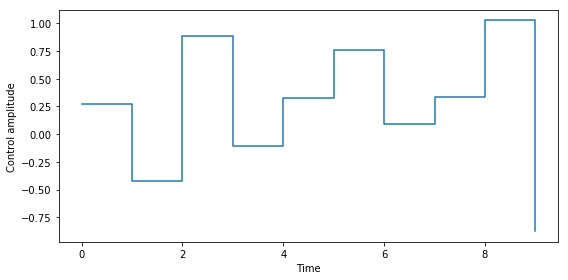

In [3]:
qc = QubitCircuit(N)
qc.add_gate("SNOT", 0)

# This method calls optimize_pulse_unitary
tlist, amps = test_processor.load_circuit(qc, n_ts=10, evo_time=10, min_grad=1e-20, init_pulse_type='RND')
test_processor.plot_pulses(figsize=(8,4));

## Method: run_state
One can then calculate the evolution. The method `run_state` calls mesolve and return the result. If the time slice for the control pulses is not small enough, `dt` can be used to set a refined time slice for `mesolve`.

In [4]:
rho0 = basis(2,1)
plus = (basis(2,0) + basis(2,1)).unit()
minus = (basis(2,0) - basis(2,1)).unit()
result = test_processor.run_state(rho0=rho0)
result.states[-3]
print("Fidelity:", fidelity(result.states[-1], minus))
# The fidelity decrease if collapse operator is added
result = test_processor.run_state(rho0=rho0, c_ops=[0.1*sigmax()])
print("Fidelity with collapses:", fidelity(result.states[-1], minus))

Fidelity: 0.9999999971169712
Fidelity with collapses: 0.968775546792996


# Other motheds

Add/Remove control Hamiltonians

In [5]:
test_processor.add_ctrl(sigmay())
test_processor.ctrls

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]]]

In [6]:
test_processor.remove_ctrl(1)
test_processor.ctrls

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]]]

Save and read pulse

In [7]:
test_processor.save_amps("test.txt")
test_processor2 = OptPulseProcessor(N, H_d, H_c)
# no pulse
print(test_processor2.amps)
# import pulse amplitudes from a file
test_processor2.read_amps("test.txt")
print(test_processor2.amps)

[]
[[ 0.27152892 -0.41951929  0.8816834  -0.10779399  0.32543542  0.75446627
   0.09363739  0.3327739   1.02535338 -0.87541585]]
